1. Зниження
розмірності і візуалізація даних

Назви колонок: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
Розмір датасету: (3276, 10)

Кількість пропусків у кожній колонці:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

=== Random Forest на початкових даних ===
Accuracy: 0.663
Час навчання: 3.9577 сек

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       600
           1       0.65      0.29      0.40       383

    accuracy                           0.66       983
   macro avg       0.66      0.60      0.58       983
weighted avg       0.66      0.66      0.62       983

Confusion matrix:
 [[540  60]
 [271 112]]

=== Random Forest після PCA (2 компоненти) ===
Accuracy: 0.571

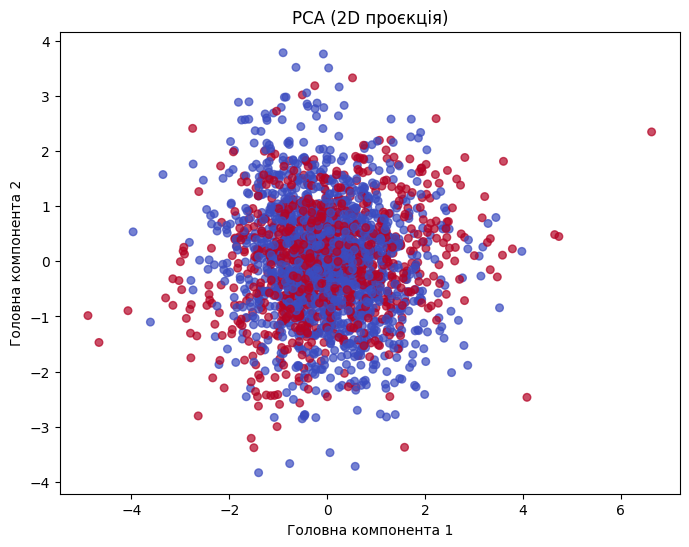

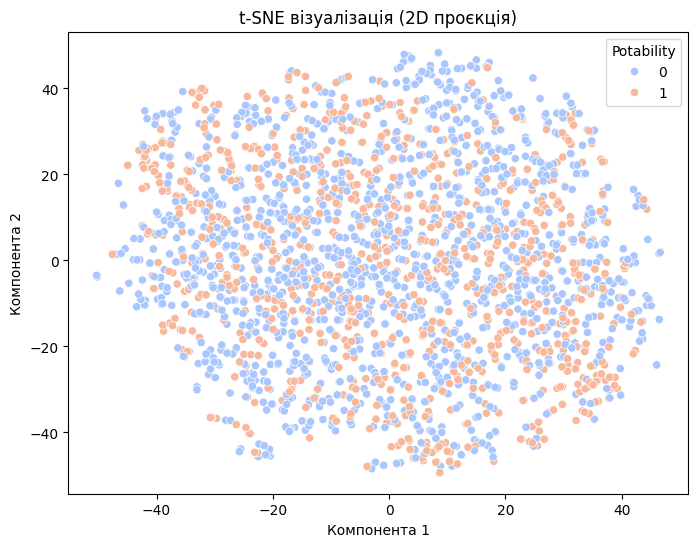


ВИСНОВКИ:
1. PCA зменшило розмірність із 9 ознак до 2, що прискорило навчання моделі Random Forest.
2. Точність трохи зменшилась через втрату частини інформації при проєкції.
3. t-SNE показав, що дані не мають абсолютно чіткої межі між класами, але видно певні групи.
4. PCA і t-SNE корисні для візуалізації структури даних, але для точної класифікації краще зберігати повну розмірність.


In [13]:
# === Імпорт бібліотек ===
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# === 1. Завантаження даних ===
url = "https://raw.githubusercontent.com/ilchukjulia059-cyber/NeuroLabs/refs/heads/main/Lab1/water_potability.csv"
df = pd.read_csv(url)

print("Назви колонок:", df.columns.tolist())
print("Розмір датасету:", df.shape)
print("\nКількість пропусків у кожній колонці:")
print(df.isnull().sum())

# === 2. Обробка пропусків ===
# Заповнимо пропуски медіанними значеннями для кожної колонки
df.fillna(df.median(), inplace=True)

# === 3. Поділ на ознаки і цільову змінну ===
X = df.drop(columns=['Potability'])
y = df['Potability']

# === 4. Розділення на навчальну і тестову вибірки ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 5. Масштабування ознак ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 6. Навчання Random Forest на початкових даних ===
rf = RandomForestClassifier(random_state=42)

start = time.time()
rf.fit(X_train_scaled, y_train)
train_time_original = time.time() - start

y_pred = rf.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred)

print("\n=== Random Forest на початкових даних ===")
print(f"Accuracy: {acc_original:.3f}")
print(f"Час навчання: {train_time_original:.4f} сек")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# === 7. PCA для зменшення розмірності (до 2 компонент) ===
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rf_pca = RandomForestClassifier(random_state=42)

start = time.time()
rf_pca.fit(X_train_pca, y_train)
train_time_pca = time.time() - start

y_pred_pca = rf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("\n=== Random Forest після PCA (2 компоненти) ===")
print(f"Accuracy: {acc_pca:.3f}")
print(f"Час навчання: {train_time_pca:.4f} сек")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_pca))

# === 8. Порівняння результатів ===
print("\n=== Порівняння ===")
print(f"Початкові дані: Accuracy = {acc_original:.3f}, Час = {train_time_original:.4f} сек")
print(f"PCA (2 компоненти): Accuracy = {acc_pca:.3f}, Час = {train_time_pca:.4f} сек")

# === 9. Візуалізація PCA ===
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', s=30, alpha=0.7)
plt.title("PCA (2D проєкція)")
plt.xlabel("Головна компонента 1")
plt.ylabel("Головна компонента 2")
plt.show()

# === 10. Візуалізація за допомогою t-SNE ===
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train, palette='coolwarm')
plt.title("t-SNE візуалізація (2D проєкція)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

# === 11. Короткі висновки ===
print("\nВИСНОВКИ:")
print("1. PCA зменшило розмірність із 9 ознак до 2, що прискорило навчання моделі Random Forest.")
print("2. Точність трохи зменшилась через втрату частини інформації при проєкції.")
print("3. t-SNE показав, що дані не мають абсолютно чіткої межі між класами, але видно певні групи.")
print("4. PCA і t-SNE корисні для візуалізації структури даних, але для точної класифікації краще зберігати повну розмірність.")


2. Кластерний аналіз

Завантажено зображення Diamond Beach
Форма зображення: (534, 800, 3)
Тип даних: uint8


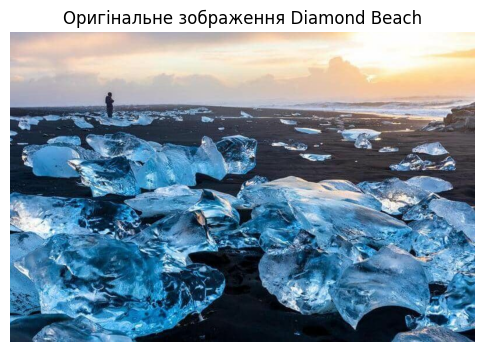

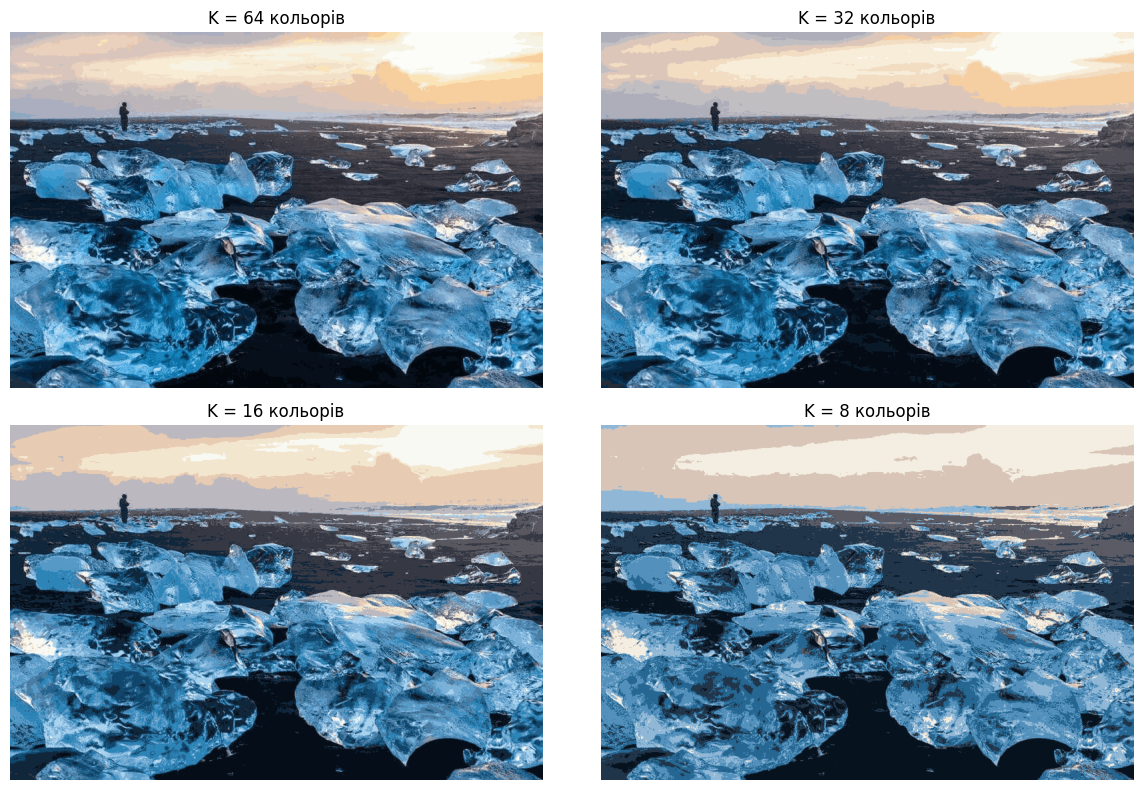

Унікальних кольорів у вихідному зображенні: 116061
Унікальних кольорів при K=64: 64
Унікальних кольорів при K=32: 32
Унікальних кольорів при K=16: 16
Унікальних кольорів при K=8: 8


In [4]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
from io import BytesIO

# === 1. Завантаження зображення Diamond Beach ===
url = "https://icelanddiscover.is/wp-content/uploads/2023/02/Diamond-Beach-e16044072834091.jpg"  # приклад фото Diamond Beach
# Якщо хочеш — заміни URL на інший прямий лінк на зображення

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.convert("RGB")  # гарантуємо тричканальний RGB

img_np = np.array(img)

print("Завантажено зображення Diamond Beach")
print("Форма зображення:", img_np.shape)
print("Тип даних:", img_np.dtype)

# === 2. Показ оригінального зображення ===
plt.figure(figsize=(6,6))
plt.imshow(img_np)
plt.title("Оригінальне зображення Diamond Beach")
plt.axis('off')
plt.show()

# === 3. Підготовка даних для кластеризації ===
# Нормалізуємо значення пікселів до [0,1]
data = img_np / 255.0
pixels = data.reshape(-1, 3)  # кожен піксель як точка в 3D (RGB)

# === 4. Функція для квантування зображення ===
def quantize_image(pixels, k, original_shape):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(pixels)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    quantized_img = new_colors.reshape(original_shape)
    return quantized_img

# === 5. Квантуємо для різних значень K ===
depths = [64, 32, 16, 8]

plt.figure(figsize=(12, 8))
for i, k in enumerate(depths):
    quantized = quantize_image(pixels, k, img_np.shape)
    plt.subplot(2, 2, i+1)
    plt.imshow(quantized)
    plt.title(f"K = {k} кольорів")
    plt.axis('off')

plt.tight_layout()
plt.show()

# === 6. Порахувати унікальні кольори ===
original_unique = np.unique(img_np.reshape(-1, 3), axis=0)
print("Унікальних кольорів у вихідному зображенні:", original_unique.shape[0])

for k in depths:
    quantized = quantize_image(pixels, k, img_np.shape)
    quantized_uint8 = (quantized * 255).astype(np.uint8)
    unique_colors = np.unique(quantized_uint8.reshape(-1, 3), axis=0)
    print(f"Унікальних кольорів при K={k}:", unique_colors.shape[0])


3. Обробка та класифікація текстових даних

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Розмір датасету: (2225, 2)
                                                text  label
0  Budget to set scene for election\n \n Gordon B...      0
1  Army chiefs in regiments decision\n \n Militar...      0
2  Howard denies split over ID cards\n \n Michael...      0
Унікальні мітки класів: [0 1 2 3 4]

Кількість текстів у кожному класі:
label_text
Sport            511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64


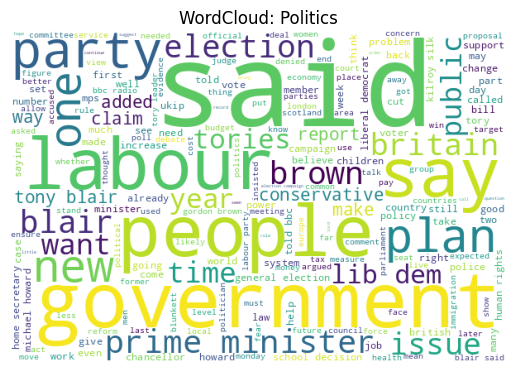

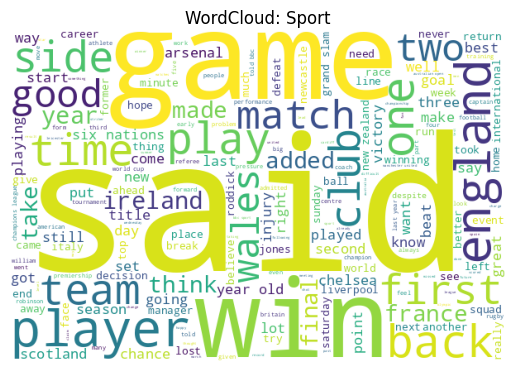

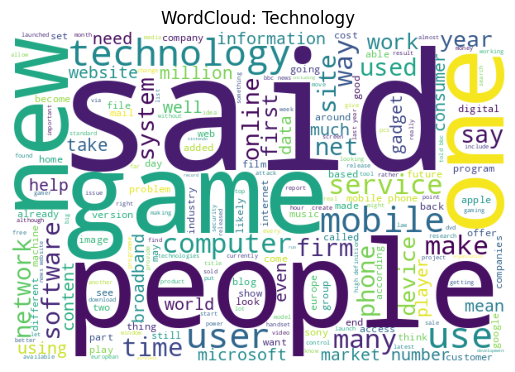

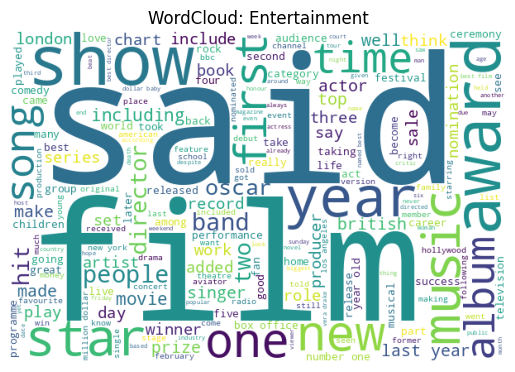

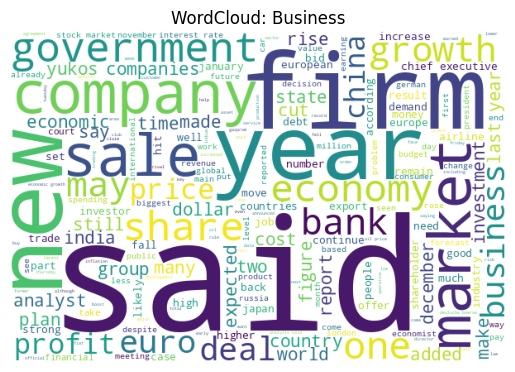


=== MultinomialNB ===
               precision    recall  f1-score   support

     Business       0.96      0.96      0.96       102
Entertainment       0.99      0.92      0.95        77
     Politics       0.95      0.98      0.96        84
        Sport       0.98      1.00      0.99       102
   Technology       0.94      0.95      0.94        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



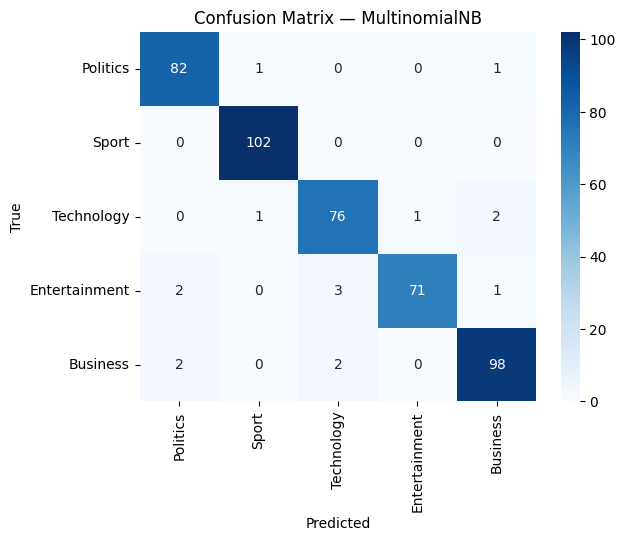


=== Logistic Regression (balanced) ===
               precision    recall  f1-score   support

     Business       0.96      0.95      0.96       102
Entertainment       0.99      0.97      0.98        77
     Politics       0.98      0.99      0.98        84
        Sport       0.99      1.00      1.00       102
   Technology       0.96      0.96      0.96        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



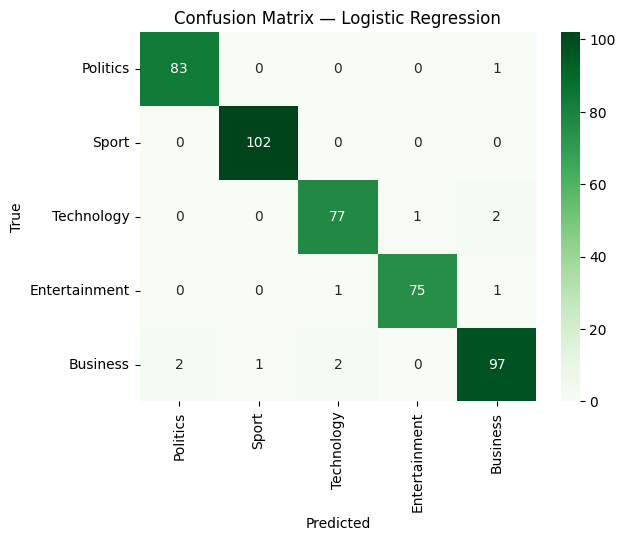

In [11]:
# === Імпорт ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# === Завантаження датасету =====================

url = "https://raw.githubusercontent.com/ilchukjulia059-cyber/NeuroLabs/refs/heads/main/Lab2/df_file.csv"
df = pd.read_csv(url)

# Встановлюємо однакові назви колонок
df.columns = ['text', 'label']

print("Розмір датасету:", df.shape)
print(df.head(3))

# === Переглянути унікальні класи ===============
print("Унікальні мітки класів:", df['label'].unique())

# === Функція очищення тексту ===================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", " ", text)       # видалення URL
    text = re.sub(r"[^a-z\s]", " ", text)              # залишити тільки літери
    tokens = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

df['text_clean'] = df['text'].apply(clean_text)

# === Словникова мапа класів ====================
label_map = {
    0: 'Politics',
    1: 'Sport',
    2: 'Technology',
    3: 'Entertainment',
    4: 'Business'
}
df['label_text'] = df['label'].map(label_map)

print("\nКількість текстів у кожному класі:")
print(df['label_text'].value_counts())

# === WordCloud для кожного класу ==============
def visualize(label):
    texts = " ".join(df[df['label_text'] == label]['text_clean'])
    if not texts.strip():
        print(f"Немає слів для класу {label}")
        return
    wc = WordCloud(width=600, height=400, background_color="white").generate(texts)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f"WordCloud: {label}")
    plt.show()

for lbl in df['label_text'].unique():
    visualize(lbl)

# === Train/Test split ===========================
X_train, X_test, y_train, y_test = train_test_split(
    df['text_clean'], df['label_text'], test_size=0.2,
    random_state=42, stratify=df['label_text']
)

# === TF-IDF векторизація ========================
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

# === Multinomial Naive Bayes ===================
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

print("\n=== MultinomialNB ===")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=df['label_text'].unique())
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['label_text'].unique(),
            yticklabels=df['label_text'].unique())
plt.title("Confusion Matrix — MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# === Logistic Regression ======================
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_vec, y_train)
y_pred_lr = logreg.predict(X_test_vec)

print("\n=== Logistic Regression (balanced) ===")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr, labels=df['label_text'].unique())
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=df['label_text'].unique(),
            yticklabels=df['label_text'].unique())
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
